**Introduction**: 
Chess Piece Classification with CNN

**Objective**:
This Jupyter Notebook demonstrates the process of training a Convolutional Neural Network (CNN) for the classification of chess pieces into five categories. By following this notebook, you will learn how to build, train, and evaluate a deep learning model for recognizing and classifying chess pieces in images.

**Dataset Description**:
The dataset used in this notebook contains images of chess pieces, categorized into five classes: King, Queen, Bishop, Knight, and Rook. These images may vary in size, quality, and orientation, presenting real-world challenges for classification.

**Methods and Techniques**:

Convolutional Neural Networks (CNNs) for image classification.
Data augmentation to improve model generalization.
K-fold cross-validation for robust model evaluation.

**Expected Outcomes**:
By the end of this notebook, you should be able to:

Train a CNN model to accurately classify chess pieces.
Understand and implement data augmentation for improved model performance.
Evaluate model performance using k-fold cross-validation.

**Notebook Structure**:

Dataset Loading and Preprocessing
Model Definition (CNN Architecture)
Data Augmentation
K-Fold Cross-Validation
Model Training and Evaluation
Conclusion and Further Steps

In [3]:
pip install opencv-python
pip install tensorflow opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Horus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

The code is designed to loop through each category of chess pieces, read the images within those categories, resize them to a consistent size (e.g., 224x224 pixels), and collect both the resized images (X_train) and their corresponding labels (y_train) for later use in model training.

In [9]:
# Define the path to your dataset folder
dataset_path = '../data/chess-pieces-detection-images-dataset'

# Initialize empty lists to store images and labels
X_train = []
y_train = []

# Iterate through the subfolders (chess piece categories)
for chess_piece in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, chess_piece)):
        for image_file in os.listdir(os.path.join(dataset_path, chess_piece)):
            image_path = os.path.join(dataset_path, chess_piece, image_file)
            
            # Read the image using OpenCV
            image = cv2.imread(image_path)
            
            # Resize the image to a consistent size (e.g., 224x224)
            image = cv2.resize(image, (224, 224))
            
            # Append the image to X_train and the label to y_train
            X_train.append(image)
            y_train.append(chess_piece)

In [10]:
# Convert X_train to a numpy array
X_train = np.array(X_train)

In [11]:
X_train[0]

array([[[ 27,  38,  52],
        [ 27,  38,  52],
        [ 26,  37,  51],
        ...,
        [ 39,  46,  61],
        [ 39,  46,  61],
        [ 39,  46,  61]],

       [[ 28,  39,  53],
        [ 27,  38,  52],
        [ 27,  38,  52],
        ...,
        [ 37,  44,  59],
        [ 38,  45,  60],
        [ 38,  45,  60]],

       [[ 29,  40,  54],
        [ 28,  39,  53],
        [ 28,  39,  53],
        ...,
        [ 34,  41,  56],
        [ 35,  42,  57],
        [ 35,  42,  57]],

       ...,

       [[ 60, 110, 138],
        [ 61, 111, 139],
        [ 62, 112, 140],
        ...,
        [ 57, 101, 125],
        [ 59, 103, 127],
        [ 62, 106, 130]],

       [[ 71, 121, 149],
        [ 76, 126, 154],
        [ 82, 132, 160],
        ...,
        [ 54,  98, 122],
        [ 59, 103, 127],
        [ 63, 107, 131]],

       [[ 79, 129, 157],
        [ 85, 135, 163],
        [ 90, 140, 168],
        ...,
        [ 45,  89, 113],
        [ 49,  93, 117],
        [ 53,  97, 121]]

In [12]:
# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [13]:
y_train_encoded[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [15]:
# Split the data into training and validation sets (adjust the test_size as needed)
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

In [16]:
y_train_encoded[:40]

array([2, 3, 1, 0, 3, 4, 1, 3, 3, 0, 4, 4, 2, 3, 3, 2, 3, 2, 3, 4, 4, 3,
       2, 2, 2, 3, 4, 0, 0, 3, 1, 1, 0, 4, 4, 4, 4, 0, 1, 0], dtype=int64)

In [17]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [18]:
# Verify the shapes of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_encoded.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val_encoded.shape)

X_train shape: (416, 224, 224, 3)
y_train shape: (416,)
X_val shape: (104, 224, 224, 3)
y_val shape: (104,)


In [19]:
# Define a list of class labels for reference
class_labels = ["Queen", "Rook", "Bishop", "Knight", "Pawn"]

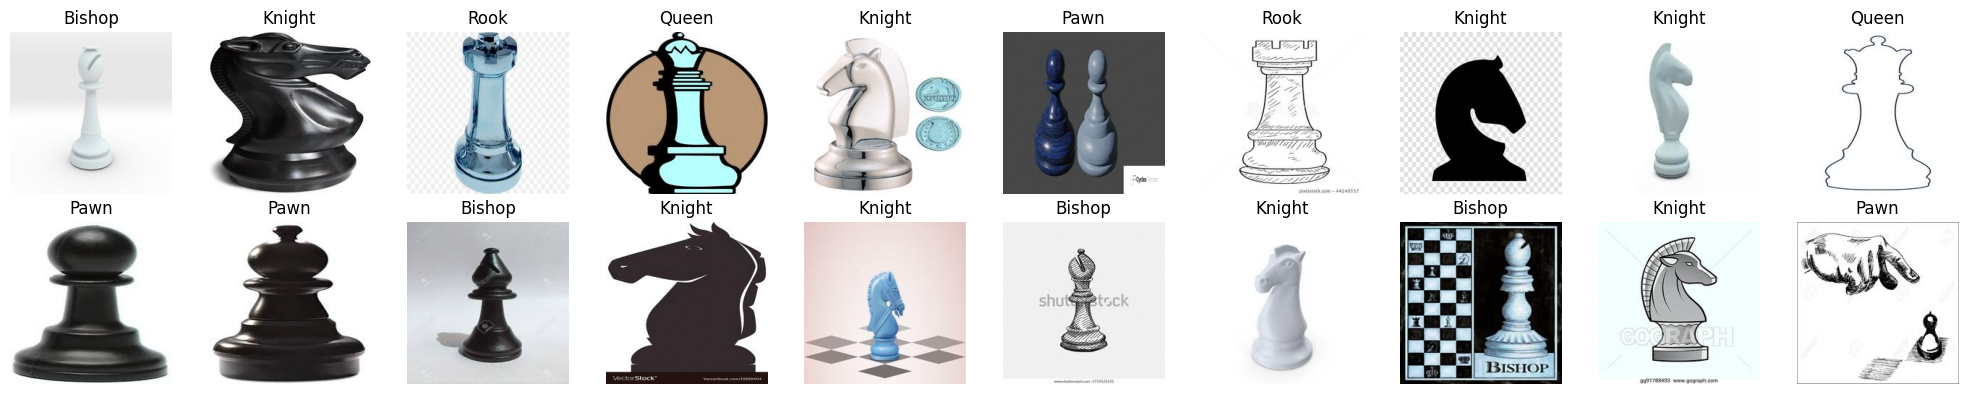

In [20]:
# Set the number of images to display side by side with their actual labels
num_images_to_display = 20


plt.figure(figsize=(20, 4))  


for i in range(num_images_to_display):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train_encoded[i]])  # Set the title as the class label
    plt.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [21]:
# # Define the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(256, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(5, activation='softmax')  # 5 output classes (one for each chess piece)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Display a summary of the model's architecture
# model.summary()


The code is about building a custom image classification model using transfer learning with the VGG16 architecture. It loads a pre-trained VGG16 model, adds custom classification layers on top, freezes the pre-trained layers, and compiles the model for training.

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()



58889256/58889256 [==============================] - 14s 0us/step

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [23]:
# # Fit (train) the model on the training data and validate it on the validation data
# history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded))

In [26]:
# Fit (train) the model on the training data and validate it on the validation data
history = model.fit(X_train, y_train_encoded, epochs=15, batch_size=32, validation_data=(X_val, y_val_encoded))

Epoch 1/15
13/13 [==============================] - 151s 12s/step - loss: 1.9532 - accuracy: 0.3702 - val_loss: 1.0651 - val_accuracy: 0.6346
Epoch 2/15
13/13 [==============================] - 150s 12s/step - loss: 1.6296 - accuracy: 0.4303 - val_loss: 0.8355 - val_accuracy: 0.7500
Epoch 3/15
13/13 [==============================] - 149s 12s/step - loss: 1.0599 - accuracy: 0.5986 - val_loss: 0.6558 - val_accuracy: 0.7596
Epoch 4/15
13/13 [==============================] - 162s 13s/step - loss: 0.9170 - accuracy: 0.6635 - val_loss: 0.6790 - val_accuracy: 0.7981
Epoch 5/15
13/13 [==============================] - 162s 13s/step - loss: 0.7602 - accuracy: 0.7091 - val_loss: 0.5256 - val_accuracy: 0.8462
Epoch 6/15
13/13 [==============================] - 158s 12s/step - loss: 0.7940 - accuracy: 0.6779 - val_loss: 0.5047 - val_accuracy: 0.8077
Epoch 7/15
13/13 [==============================] - 157s 12s/step - loss: 0.6628 - accuracy: 0.7356 - val_loss: 0.5265 - val_accuracy: 0.8077
Epoch 

In [27]:
pred = model.predict(X_val)
pred[:10]

4/4 [==============================] - 29s 7s/step


array([[6.34568512e-01, 3.08919568e-02, 2.87810355e-01, 1.03543336e-02,
        3.63748297e-02],
       [3.57961515e-03, 1.31828419e-04, 9.91901219e-01, 1.20238506e-03,
        3.18489620e-03],
       [3.29278200e-03, 9.96049702e-01, 2.54324463e-04, 3.04074056e-04,
        9.90916160e-05],
       [3.27187399e-06, 2.73949627e-05, 1.24742088e-04, 9.99837279e-01,
        7.32476246e-06],
       [9.25166547e-01, 3.66745256e-02, 3.59596014e-02, 9.19379876e-04,
        1.27997319e-03],
       [6.00118414e-02, 7.78741896e-01, 4.15816484e-03, 1.56196728e-01,
        8.91328091e-04],
       [5.73211310e-07, 7.60074681e-06, 2.27211399e-06, 9.99989271e-01,
        2.97952710e-07],
       [7.40608666e-05, 2.27133845e-04, 1.39268217e-04, 9.99525785e-01,
        3.37411184e-05],
       [1.50751447e-08, 1.97733044e-07, 4.45981550e-06, 9.99995232e-01,
        1.26180915e-08],
       [4.03387379e-03, 3.07313092e-02, 2.18571746e-03, 9.62158501e-01,
        8.90498341e-04]], dtype=float32)

In [28]:
y_val_encoded[:10]

array([0, 2, 1, 3, 0, 1, 3, 3, 3, 0], dtype=int64)

In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val_encoded)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 32s 7s/step - loss: 0.4273 - accuracy: 0.8654
Test Accuracy: 0.8653846383094788


In [30]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the number of folds (e.g., 5)
num_folds = 5

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation results for each fold
val_accuracies = []

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Perform k-fold cross-validation
for train_index, _ in kf.split(X_train, y_train_encoded):
    X_train_fold, y_train_fold = X_train[train_index], y_train_encoded[train_index]
    
    
    
    # Create an ImageDataGenerator for data augmentation
    train_datagen = datagen.flow(X_train_fold, y_train_fold, batch_size=32)
    
    
    model.fit(train_datagen, epochs=15, verbose=0)
    
    
    _, val_accuracy = model.evaluate(X_val, y_val_encoded)
    val_accuracies.append(val_accuracy)

# Calculate and print the mean and standard deviation of validation accuracies
mean_val_accuracy = np.mean(val_accuracies)
std_val_accuracy = np.std(val_accuracies)
print("Mean Validation Accuracy: {:.2f}%".format(mean_val_accuracy * 100))
print("Standard Deviation: {:.2f}".format(std_val_accuracy))

4/4 [==============================] - 29s 7s/step - loss: 0.4670 - accuracy: 0.8269


KeyboardInterrupt: 

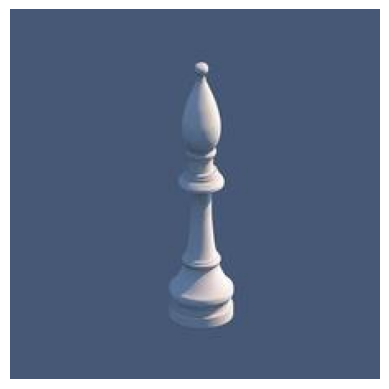

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_test = '../data/chess-pieces-detection-images-dataset/bishop_resized/00000017_resized.jpg'

# Load and display the image
img = mpimg.imread(img_test)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a pre-trained model (e.g., VGG16)
# model = tf.keras.applications.VGG16(weights='imagenet')

# Load and preprocess the custom image
custom_image_path2 = '../data/chess-pieces-detection-images-dataset/bishop_resized/00000017_resized.jpg'
custom_image_path1 = '../data/chess-pieces-detection-images-dataset/pawn_resized/00000140_resized.jpg'
custom_image_path = '../data/Chessman-image-dataset/Chess_resized/knight/00000162.jpg'



img = image.load_img(custom_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

# Make predictions on the custom image
predictions = model.predict(img_array)

# Use argmax to get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Decode the predictions to get class labels
#predicted_class = tf.keras.applications.vgg16.decode_predictions(predictions, top=1)[0][0]

# Print the predicted class label and its probability
print("Predicted class:",class_labels[predicted_class_index])

1/1 [==============================] - 0s 348ms/step
Predicted class: Knight


In [57]:
import pathlib
import cv2

# Ruta al directorio original de imágenes
original_dir = '../data/Chessman-image-dataset/Chess'
original_dir = pathlib.Path(original_dir)

# Ruta al directorio de destino para las imágenes redimensionadas
resized_dir = '../data/Chessman-image-dataset/Chess_resized'
resized_dir = pathlib.Path(resized_dir)
resized_dir.mkdir(parents=True, exist_ok=True)  # Crea el directorio si no existe

# Tamaño deseado para las imágenes redimensionadas
new_size = (240, 240)

# Itera sobre todas las imágenes en el directorio original
for image_path in original_dir.glob('*/*.jpg'):
    # Carga la imagen usando OpenCV
    image = cv2.imread(str(image_path))
    
    # Redimensiona la imagen
    resized_image = cv2.resize(image, new_size)
    
    # Ruta de la nueva imagen redimensionada
    new_image_path = resized_dir / image_path.relative_to(original_dir)
    
    # Crea los directorios necesarios si no existen
    new_image_path.parent.mkdir(parents=True, exist_ok=True)
    
    # Guarda la imagen redimensionada
    cv2.imwrite(str(new_image_path), resized_image)

print("¡Proceso completado!")


¡Proceso completado!


In [61]:
import pickle

# Guardar el modelo como Pickle
with open('custom_vgg16_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Para cargar el modelo más tarde
# with open('custom_vgg16_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# Guardar el modelo como HDF5
model.save('custom_vgg16_model.h5')

# Para cargar el modelo más tarde
# loaded_model = tf.keras.models.load_model('custom_vgg16_model.h5')

# Guardar el modelo como SavedModel
tf.saved_model.save(model, 'custom_vgg16_model_savedmodel')

# Para cargar el modelo más tarde
# loaded_model = tf.saved_model.load('custom_vgg16_model_savedmodel')


C:\Users\Horus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: custom_vgg16_model_savedmodel\assets


INFO:tensorflow:Assets written to: custom_vgg16_model_savedmodel\assets
